In [65]:
import pandas as pd
import datetime as dt
import numpy as np


data = pd.read_csv("../raw_data/AAPL.csv", parse_dates = True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.629209,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.697079,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.838044,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.972249,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.951672,394024400


In [66]:
data['Date'] = pd.to_datetime(data['Date'])

In [67]:
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [68]:
data.shape

(2374, 7)

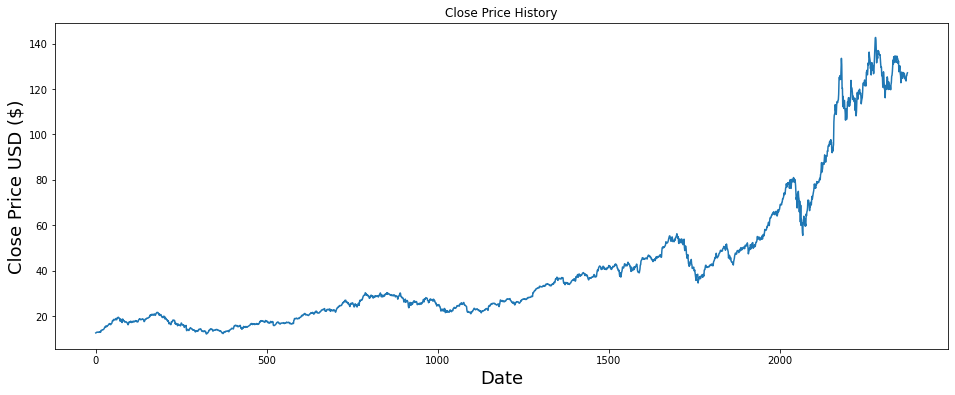

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(data['Adj Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [70]:
# Create a new dataframe with only the 'Close column 
data = data.filter(['Adj Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len



### A définir###

2256

In [71]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00351393],
       [0.00403387],
       [0.00511378],
       ...,
       [0.87126669],
       [0.87770179],
       [0.88068952]])

In [72]:
# Create the training data set       ### A définir###

# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00351393, 0.00403387, 0.00511378, 0.00614191, 0.00598427,
       0.00633953, 0.0061772 , 0.00590429, 0.00553253, 0.00668304,
       0.00772057, 0.00740061, 0.00564784, 0.00732061, 0.00567371,
       0.01184961, 0.011372  , 0.01199546, 0.01334356, 0.01415994,
       0.01409174, 0.01383997, 0.01491284, 0.01592216, 0.01706557,
       0.01891247, 0.02279207, 0.0228509 , 0.0250107 , 0.02662466,
       0.02385083, 0.02491895, 0.02489776, 0.02789279, 0.02746691,
       0.02825506, 0.02967139, 0.03045958, 0.03272998, 0.03438391,
       0.03486148, 0.03502857, 0.0322006 , 0.0315183 , 0.03161949,
       0.03427797, 0.03502622, 0.03663308, 0.04042099, 0.0454746 ,
       0.04452883, 0.04453122, 0.04818498, 0.04932838, 0.04851435,
       0.04777088, 0.04699681, 0.04956837, 0.05133285, 0.05207163])]
[0.050245926934028226]

[array([0.00351393, 0.00403387, 0.00511378, 0.00614191, 0.00598427,
       0.00633953, 0.0061772 , 0.00590429, 0.00553253, 0.00668304,
       0.00772057, 0.00740061, 0.0

In [73]:
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2196/2196 [==============================] - 75s 33ms/step - loss: 0.0021


In [79]:
# Create the testing data set

# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

3.8589635366521238

<ipython-input-80-a391d7efa6a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


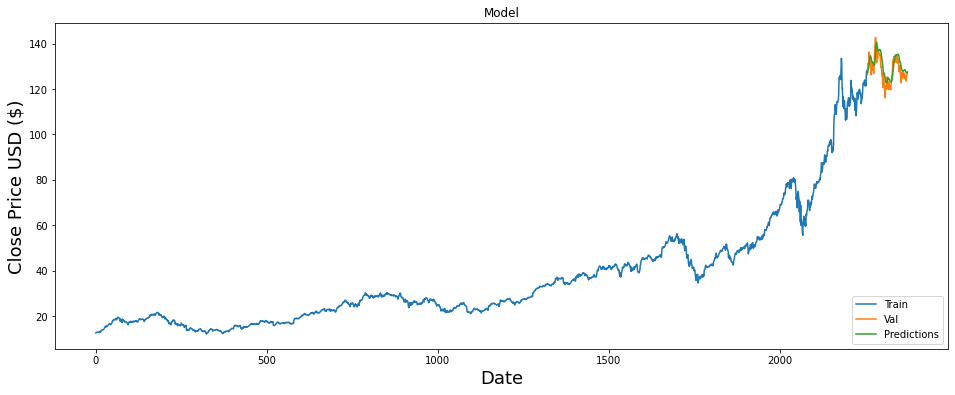

In [80]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [81]:
# Show the valid and predicted prices
valid

,Adj Close,Predictions
2256,126.256561,127.137817
2257,127.821548,127.753593
2258,131.459930,128.339966
2259,130.542862,129.382233
2260,131.549637,130.280075
...,...,...
2369,123.540001,127.440880
2370,125.889999,127.039322
2371,125.900002,127.028328
2372,126.739998,127.169777
